# EDA - Exploratory Data Analysis

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
sns.get_dataset_names()

df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [38]:
df.rename({'sex':'gender'}, inplace=True, axis=1)

In [39]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [21]:
df_std = pd.DataFrame(df.describe().T[['std']].to_numpy() / df.describe().T[['mean']].to_numpy()).T

df_std

,0,1,2,3
0,0.124302,0.11514,0.069988,0.190862


In [27]:
df_std.columns = df.describe().columns

In [28]:
df_std

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.124302,0.11514,0.069988,0.190862


In [41]:
df_categorical = df[['species', 'island', 'gender']]

In [42]:
df_categorical.describe()

,species,island,gender
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


In [44]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
gender               11
dtype: int64

In [46]:
df.duplicated().sum()

0

In [51]:
df['bill_length_mm']=df['bill_length_mm'].fillna(df['bill_depth_mm'].mean())



In [52]:
df.isnull().sum()


species               0
island                0
bill_length_mm        0
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
gender               11
dtype: int64

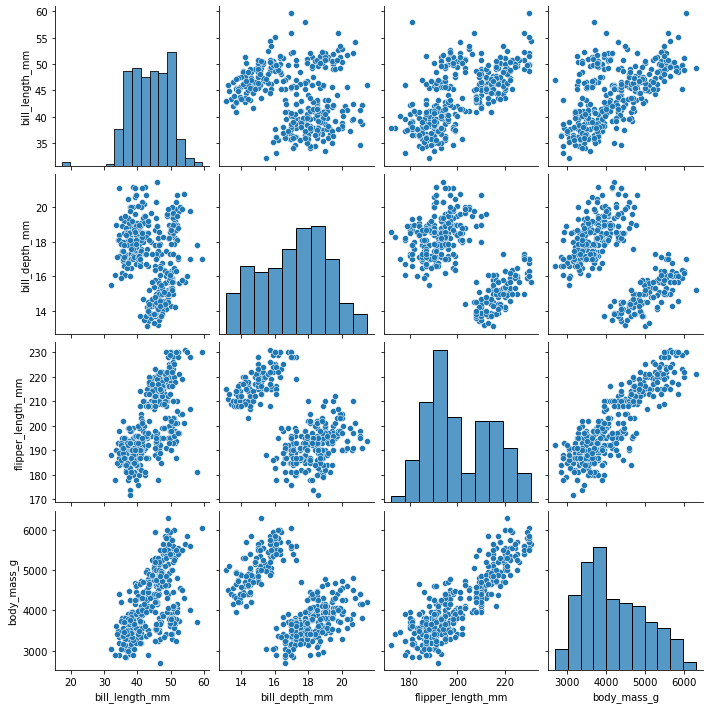

In [53]:
sns.pairplot(df)

<AxesSubplot:>

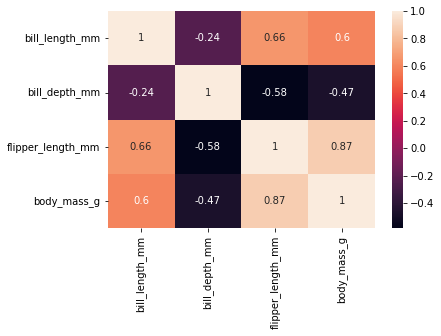

In [54]:
sns.heatmap(df.corr(),annot=True)

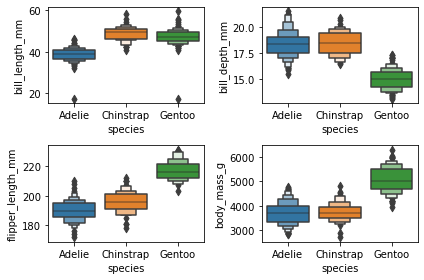

In [57]:
plt.subplot(2,2,1)
sns.boxenplot(data=df, x='species', y='bill_length_mm')
plt.subplot(2,2,2)
sns.boxenplot(data=df, x='species', y='bill_depth_mm')

plt.subplot(2,2,3)
sns.boxenplot(data=df, x='species', y='flipper_length_mm')

plt.subplot(2,2,4)
sns.boxenplot(data=df, x='species', y='body_mass_g')

plt.tight_layout()